### Cuines (TV3 Catalunya) recipies.
Looking for the percentage of types of recipies (vegetarian, with meat, desserts...)

In [8]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium import webdriver
import pandas as pd 
import re 

import seaborn as sns
import matplotlib.pyplot as plt



opts = Options()
opts.set_headless()
assert opts.headless  # Operating in headless mode

<ipython-input-8-448b215d50ce>:13: DeprecationWarning: use setter for headless property instead of set_headless
  opts.set_headless()


In [2]:
from selenium import webdriver as selenium_webdriver
from selenium.webdriver.firefox.options import Options as selenium_options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities as selenium_DesiredCapabilities

In [3]:
driver = Firefox(options=opts)

##### Browse through all pages to get the links to every single recipy

In [86]:
receptes=[]
n=1
while n<471:
    url= 'https://www.ccma.cat/Comu/standalone/tv3_cuines_receptes/contenidor/receptesStandAlone/'+str(n)+'/0/'
    driver.get(url)
    mapaweb_link = driver.find_elements_by_class_name('media-object')
    for mapa in mapaweb_link:
        receptes.append(mapa.get_attribute("href"))
    n=n+1

###### Store the list into a database and save it to avoid start browsing every single time

In [ ]:
df = pd.DataFrame(receptes)
dfcuines.rename(columns = {'0':'URL', '0':'Recepta','0':'Ingredients'}, inplace = True)
df.head()

In [88]:
df.to_csv('links_receptes.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7048 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


<br><br><br><br>
##### Load the database to get the ingredients of all recipies

In [39]:
df1=pd.read_csv('links_receptes.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df1=df1.drop(['Unnamed: 0'], axis=1)
df1.rename(columns = {'0':'URLs'}, inplace = True)
df1.head()

,URLs
0,https://www.ccma.cat/tv3/cuines/recepta/filets...
1,https://www.ccma.cat/tv3/cuines/recepta/truita...
2,https://www.ccma.cat/tv3/cuines/recepta/cebich...
3,https://www.ccma.cat/tv3/cuines/recepta/sarsue...
4,https://www.ccma.cat/tv3/cuines/recepta/vichys...


In [5]:
ingredients=[]
n=0
for link in df1['0']:
    driver.get(link)
    try:
        ingredients.append(driver.find_element_by_xpath("//ul[@class='items']").get_attribute("textContent"))
        print(n)
        n=n+1
    except:
        ingredients.append('no tiems found')
        print(n,'no tiems found')
        n=n+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274 no tiems f

1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033 no tiems found
2034 no tiems found
2035
2036
2037
2038
2039
2040
2041
2042


3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672


5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287


6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926


##### Save the ingrdients to a database both virtual and to a disk for later usage

In [6]:
df4 = pd.DataFrame(ingredients)
df4.head()

,0
0,INGREDIENTS PER A 4 PERSONES:1 peça d'escórpor...
1,INGREDIENTS PER A 4 PERSONES:200 g de sonsos\n...
2,INGREDIENTS PER A 4 PERSONES:PER A LA SÍPIA\n1...
3,INGREDIENTS PER A 4 PERSONES1 escórpora\n1 cas...
4,INGREDIENTS PER A 4 PERSONES\n PER A L'AIGUA D...


In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7048 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [16]:
df4.to_csv('ingredients.csv')

In [38]:
dfingredients=pd.read_csv('ingredients.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
dfingredients=dfingredients.drop(['Unnamed: 0'], axis=1)
dfingredients.rename(columns = {'0':'Ingredients'}, inplace = True)
dfingredients.head()

,Ingredients
0,INGREDIENTS PER A 4 PERSONES:1 peça d'escórpor...
1,INGREDIENTS PER A 4 PERSONES:200 g de sonsos\n...
2,INGREDIENTS PER A 4 PERSONES:PER A LA SÍPIA\n1...
3,INGREDIENTS PER A 4 PERSONES1 escórpora\n1 cas...
4,INGREDIENTS PER A 4 PERSONES\n PER A L'AIGUA D...


In [20]:
dfingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7041 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [20]:
# driver.find_element_by_xpath("//div[@class='M-itemrecepta ']/h1").text

recipies=[]
n=0
for title in df1['0']:
    driver.get(title)
    try:
        recipies.append(driver.find_element_by_xpath("//div[@class='M-itemrecepta ']/h1").text)
        print(n,driver.find_element_by_xpath("//div[@class='M-itemrecepta ']/h1").text)
        n=n+1
    except:
        recipies.append('no tiems found')
        print(n,'..........no tiems found')
        n=n+1


0 Filets d'escórpora amb crema de carbassa especiada
1 Truita de sonsos amb romesco suau
2 Cebiche de sípia amb llet de tigre
3 Sarsuela d'escórpora
4 Vichyssoise fresca
5 Tronc de lluç amb veoluté marina
6 Filets de sardina marinats amb all blanc i cireres
7 Shabu-shabu d'escamarlans i rap amb verdures
8 Polos de fruita de pinyol
9 Rap amb mel de romer
10 Gaspatxo de maduixes
11 Pop a la brasa amb cremós de patata
12 Ravioli de gamba, tàrtar de ceps i el seu pil-pil
13 Llobarro a la barbacoa
14 Amanida de patata
15 Sablé d'anxova amb escalivada
16 Carbassó farcit d'espinacs
17 Mousse de xocolata amb crumble de cacau
18 Coca salada de Sant Joan
19 Empedrat de vedella
20 Amanida de macarrons i bonítol
21 Hamburguesa de pota blava
22 Pollastre amb verdures
23 Berlina farcida de xocolata
24 Suflé de pèsols i pernil
25 Ramen de calamar
26 Còctel de gambes
27 Amanida de quinoa i fruites
28 "Salpicó" de vedella
29 Coca de Sant Joan amb trufa
30 Snacks de sardina en escabetx
31 Crema de carba

295 Coca de Sant Joan amb nata
296 Arròs de cranc blau
297 Sardines amb fonoll
298 Pollastre amb taronja
299 Virrei sense feina al forn
300 Biquini "monsieur"
301 Corball al forn amb patates
302 Pollastre amb espècies
303 Crema de ceba
304 Espinacs amb anxoves i ou mollet
305 Amanida de la burgeseta
306 Pollastre amb samfaina
307 Pastís japonès de formatge
308 Bao Bun de garró
309 Arròs d'espàrrecs
310 Dakar
311 Fricandó d'escórpora
312 Tonyina en escabetx
313 Fideus a la cassola
314 Espaguetis aglio olio
315 Hamburguesa de pollastre cruixent
316 Macarons de xocolata
317 Botifarres en escabetx
318 Escalopa de vedella amb minestra gratinada
319 Arròs amb llet i mantega
320 Tiradito de rap i safrà
321 Cabrit arrebossat amb salsa remolada
322 Verat amb crema agra
323 Okonomiyaki de cansalada i peix sec
324 Sopa de pobre
325 Crema de rovells
326 Crema de porro i carbassó
327 Magdalenes de cereals i llavors
328 Calamarsets amb cigrons
329 Flam de formatge fresc
330 Sopa de menta i maduixots

594 Cassola de pota blava amb carxofes
595 Crema de fredolics
596 Ous remenats amb bolets i foie
597 Pizza Stromboli
598 Pasta fresca de bolets
599 Salmó amb cols de Brussel·les
600 Ous amb samfaina
601 Pop en salsa
602 Pastís Pàvlova
603 Arròs amb galtes de porc
604 Bastina a la mantega negra
605 Llaminera amb magrana
606 Barretes energètiques
607 Sopa de fredolics
608 Carpaccio de ceps i bolets en conserva
609 Fricandó de vaca
610 Patates farcides
611 Sopa d'api i cigrons
612 Suquet d'anxova
613 Crema de moniato
614 Croquetes de brou
615 Crumble de meló
616 Caramels de "toffee" i pinyons
617 Terrina de xai amb cirerols
618 Fideus a la cassola
619 "Fingers" de pollastre
620 Estofat de costelles de bacallà
621 Truita en suc picant
622 Estofat de fruites vermelles amb nata d'ovella i pols de gerds
623 Arròs de peix
624 Pastissets de confitures i formatge
625 Croquetes de bolets
626 Peus de porc amb bolets
627 Panellets per a principiants
628 Albergínies farcides
629 Consomé empedrat
630

891 Nyoquis amb samfaina
892 Cigrons amb arengades
893 Fideus a la marinera
894 Truita avorrida
895 Coulant amb xocolata i plàtan
896 Orada a la sal
897 Sopa fresca amb quinoa
898 Tofu lacat
899 Salmó rock&roll
900 Truita de riu farcida
901 Spaghetti vongole
902 Arròs amb ànec i verdures
903 Crema de Sant Josep
904 Crema de pèsols
905 Risotto de tirabecs i pernil
906 Pastís de poma
907 Truita oberta de carxofes
908 Bavaresa de maduixots
909 Coca de sobrassada, formatge i espinacs
910 Bròquil gratinat
911 Saltat de verdures
912 Foie a la papillota
913 Perdiu amb castanyes
914 Cocotxes de bacallà amb cloïsses
915 Tartiflette
916 Salmó fumat especiat
917 Durum de pollastre
918 Bullabessa criolla
919 Croquetes de pollastre a l'ast
920 Pa de pessic de xocolata i pera
921 Magret d'ànec amb salsafins
922 Flam de mató
923 Pastís de formatge i taronja
924 Rotllets de pollastre amb prunes
925 Mussaca d'hivern
926 Club sandwich
927 Croquetes de calçots
928 Peus de porc amb festucs
929 Calçots de 

1183 Tataki de poltre, trinxat d'Andorra i teriyaki de yuzu
1184 Pollastre de pagès amb prunes i pinyons
1185 Risotto de plàncton i galeres
1186 Papardelle amb botifarra, bolets i all i oli
1187 Tàrtar de truita de riu
1188 Filet de porc a la sal amb suau de patata violeta i crema d'ametlles
1189 Braç de gitano de patata
1190 Amanida de fruita amb quefir i granissat de te
1191 Ous estrellats amb ceps
1192 Cebiche de porc
1193 Panadó d'espinacs, panses i pinyons
1194 Daurada amb saltat de pera de Lleida
1195 Mussola en adob
1196 Crema d'ametlles amb verat i raïm
1197 Crema de crancs de riu
1198 Turnedó de conill
1199 Tàrtar de salmó
1200 Amanida exòtica de mongetes tendres i tofu
1201 Trinxat de patata i botifarra amb bolets
1202 Mousse de iogurt, coco i maduixots
1203 Carxofes amb cloïsses
1204 Galetes decorades
1205 Filet macerat amb herbes aromàtiques i salsa tàrtara
1206 Làmines de carbassó amb tomàquet, alvocat i tamarinde
1207 Ruló de pebrots amb formatge
1208 Amanida de col, pern

1374 Plnený kapor (Peix farcit) - Eslovàquia
1375 Kapustnica (Escudella eslovaca) - Bratislava, Eslovàquia
1376 Tajine djaj (Pastís de pollastre, ou i patata) - Tunísia
1377 Chlebícky z pastétov (Paté de sardines) - Eslovàquia
1378 Demikát (Sopa amb formatge "bryndza") - Eslovàquia
1379 Zemiakový salát (Amanida de patata) - Eslovàquia
1380 Miasso v soussi (Llaminera de porc amb salsa) - Ucraïna
1381 Carne mechada con tuco (Vedella farcida amb salsa) - Uruguai
1382 Choripán (Entrepà de xoriço a la brasa) - Uruguai
1383 Torta seca de banana (Pastís de plàtan) - Uruguai
1384 Mocochinchi (Refresc de préssec) - Bolívia
1385 Borx (Escudella ucraïnesa) - Ucraïna
1386 Kovbassà domàixnia v dukhovtsi (Botifarres al forn) - Ucraïna
1387 Pascualina (Empanada uruguaiana d'espinacs i ous) - Uruguai
1388 Matambre (Rodó de vedella farcit) - Uruguai
1389 Escones (Panets de formatge) - Montevideo, Uruguai
1390 Fricasé (Guisat de costella de porc) - Bolívia
1391 Pirizhkí (Panets ucraïnesos) - Ucraïna
139

1528 Oladi (Creps gruixudes siberianes) - Krasnoyarsk, Sibèria, Rússia
1529 Granada d'albergínia
1530 Platillo de Sant Climent
1531 Pastéis de nata (Pastissets farcits de crema) - Amarante, Portugal
1532 Saltat de botifarra amb seques i ceps
1533 Pastís d'avellana i sopa de marialluïsa
1534 Koli kari (Curri de pollastre) - Sri Lanka
1535 Lérias (Pastes d'ametlla i sucre) - Amarante, Portugal
1536 Francesinha à moda do Porto (Entrepà a l'estil de Porto) - Amarante, Portugal
1537 Carne de porco alentejana (Estofat de porc amb petxines) - Amarante, Portugal
1538 Amanida de mongeta perona amb confitat de rossinyols i pernil ibèric
1539 Costelles de cabrit arrebossades amb "panko" i cacauets
1540 Parippu (Dhal) (Llegum) - Sri Lanka
1541 Tango (Cervesa amb grosella) - Amarante, Portugal
1542 Bola de carne (Empanada d'embotits) - Amarante, Portugal
1543 Panellets d'avellana
1544 Crema d'ametlla, moscatell i cansalada
1545 Selyodka pod shoubkoy (Arengades amb abric de pell) - Rússia
1546 Amani

1705 Galta de bou estofada
1706 Sípia a la bruta
1707 Patates estofades amb costella
1708 Sardines fregides amb llimona i alfàbrega
1709 Peus de porc gratinats amb salsifins
1710 Crep de fajol amb espinacs a la catalana
1711 Xai tendre farcit amb formatge i peres
1712 Pèsols negres amb confitat del Berguedà
1713 Llenties amb bolets
1714 Pa de pessic d'oli d'oliva, espinacs i taronja
1715 Caneló de remolatxa i tàrtar de vedella
1716 Pastissets de cabell d'àngel i de xocolata
1717 Patates gratinades amb botifarra negra i cremós de carabassa
1718 Amanida tèbia de calçots, carxofes, mongetes i moixama
1719 Crema de coliflor amb botifarra i oli de llimona
1720 Bròquil arrebossat amb farina d'ametlles i maionesa de taronja
1721 Crema de porros amb coco, llagostins i poma
1722 Mongetes amb morro i orella de porc
1723 Fesols de l'ull negre cuits
1724 Amanida tèbia de verdures d'hivern
1725 Crema de col llombarda amb daus de pit de gall dindi
1726 Sardines marinades amb verdures i ous d'arengad

1880 Bruschetta con pomodorini e basilico (Torradetes amb tomàquet i alfàbrega) - Itàlia
1881 Rap amb romesco verd, porros i bullabessa de safrà
1882 Amanida de remolatxa i pernil d'ànec
1883 Hiyayakko (Aperitiu de tofu) - Japó
1884 Whitebait patties (Truites de xanguet) - Nelson, Nova Zelanda
1885 Garden salad (Amanida verda) - Nelson, Nova Zelanda
1886 Conill a la sitgetana
1887 Verdures de primavera, popets i caldo de verdures
1888 Hoshi maguro (Moixama de tonyina) - Japó
1889 Poached bass (Llobarro escalfat) - Nelson, Nova Zelanda
1890 Avocado salad (Amanida d'alvocat) - Nelson, Nova Zelanda
1891 Natilla de ceba caramellitzada amb patates i espàrrecs verds
1892 Punjene pohane palacinke (Creps farcides i fregides) - Vrbovec, Croàcia
1893 Kokosja juha s noklicama (Sopa croata) - Vrbovec, Croàcia
1894 Tortada d'ametlles de Banyoles
1895 Trufes disfressades
1896 Espatlletes de conill amb xocolata, rossinyols i salsifins
1897 Cervesa casolana amb marialluïsa (tipus trapenca) (Cervesa c

2065 Calamars amb allioli de tomacó i trinxat de patata
2066 Lletons amb mantega negra
2067 Tiradito de peix blanc
2068 Tomàquets farcits de guacamole d'alfàbrega
2069 Crema de carbassa amb cargols de punxa
2070 Bombons de raïm i xocolata
2071 Savarin de poma amb mel i mató
2072 Gelat de rossinyols
2073 Llenegues amb suquet de bacallà
2074 Xai amb patata del bufet
2075 Niu de bolets
2076 Crema catalana de moniato amb mandarina
2077 Pastís cremós de xocolata
2078 Barreja dolça de bolets
2079 Mousse de xocolata
2080 Musclos en escabetx de remolatxa
2081 Filet de porc amb salsa de ceps
2082 Amanida de carbassa amb rogers
2083 Ceps amb guatlla i poma caramellitzada
2084 Bonítol amb albergínia i raïm
2085 Pularda amb préssec de vinya
2086 Macarrons ratllats a la "boscaiola"
2087 Molls farcits d'herbes aromàtiques
2088 Carpaccio de carbassó amb vinagreta d'espelta
2089 Xuixo de Girona fet al moment
2090 Crema de formatge amb fruits vermells
2091 Mandonguilles de tonyina i formatge rico

2240 Bunyols
2241 Pa de cervesa amb sègol ecològic
2242 Ensalada de nopales (Amanida de "nopales") - Michoacán, Mèxic
2243 Capirotada ("Capirotada") - Michoacán, Mèxic
2244 Arròs melós de llagostins
2245 Sekerbura (Pastissets de fruita seca) - Abseron, Azerbaidjan
2246 Merengues
2247 Pa d'espelta ecològica amb llevat
2248 Fideus d'arròs amb verdures i tofu
2249 Caneló de bou Wagyu en tàrtar
2250 Mürabba (Maduixots cuits) - Abseron, Azerbaidjan
2251 Filets de rèmols amb galeres
2252 Garotes gratinades
2253 Pastelitos criollos (Pastissets farcits de codonyat) - Córdoba, Argentina
2254 Lengua a la vinagreta (Llengua de vedella amb vinagreta) - Córdoba, Argentina
2255 Lavangi (Llobarro farcit) - Abseron, Azerbaidjan
2256 ..........no tiems found
2257 Medalló de rap amb arròs de Pals i carxofes
2258 ..........no tiems found
2259 Lomito (Entrepà de vedella) - Córdoba, Argentina
2260 ..........no tiems found
2261 Dovga (Sopa de iogurt) - Abseron, Azerbaidjan
2262 ..........no tiems found
2263

2434 Melmelada de tomàquet verd
2435 Cassola del tros
2436 Cim i tomba
2437 Lloms de conill en escabetx de flors de pastanaga
2438 Caneló de poma farcit de botifarra de perol amb pesto de flors
2439 Melmelada de carbassó
2440 Sopa de pebrot, cremós de xocolata i gelat de vainilla
2441 Samfaina amb botifarra
2442 Huminta (Pastís de blat de moro) - Bolívia
2443 Amanida amb roses
2444 Melmelada de pebrot vermell
2445 Bombons salats de poma i formatge, i de botifarra
2446 Fideuà vegetal
2447 Got de crema anglesa amb maçana caramel·litzada
2448 Rodekool met hassee en appeltjes (Estofat holandès) - Holanda
2449 Arròs caldós de gambes de Palamós amb botifarra negra
2450 Morro de bacallà, sobrassada i cabell d'àngel
2451 Suquet d'escórpora
2452 Cóc de maçana
2453 Cóc daurat
2454 Sopa de recuit de Fonteta amb fruits vermells
2455 Tàrtar de gambes de Palamós amb alvocat i tomàquet
2456 Croquetes de formatge blau
2457 Truita de pa amb tomàquet i escamarlans
2458 Ametllats
2459 Verdures saltades a

2607 Crema d'au
2608 Pyogobosod-jon (Bolets farcits) - Seül, Corea del Sud
2609 Raviolis amb iogurt amb vinagre de cava, sopa de poma i cítrics
2610 Carpaccio d'escamarlans amb mandarina i vainilla
2611 Knedl (Pa bullit) - Olomouc, Txèquia
2612 Vianda (Tubercles bullits) - l'Havana, Cuba
2613 Sardines amb verduretes saltades i reducció de taronja
2614 Jarret de vedella amb peres i mongetes del ganxet
2615 Sopa d'avellanes amb el seu cruixent
2616 Svícková (Tall rodó amb salsa) - Olomouc, Txèquia
2617 Farcellets de patata amb sípia, gambes i ceps
2618 Pudding de pan (Púding de pa) - l'Havana, Cuba
2619 Sopa de galeres
2620 Fideus amb bull d'ossos i trompetes de la mort
2621 Cesnecka (Sopa d'all) - Olomouc, Txèquia
2622 Pernik (Pa de pessic farcit) - Olomouc, Txèquia
2623 Arroz imperial (Pastís d'arròs) - l'Havana, Cuba
2624 Pastís de castanyes
2625 Leche-flan (Flam filipí) - Manila, Filipines
2626 Bouneschlupp (Sopa de mongeta tendra) - Esch-Uelzecht, Luxemburg
2627 Llenties estofades a

2770 Tàrtar de llagostins amb gaspatxo de cogombre
2771 Patates fregides de colors
2772 Galta de tonyina en escabetx de rossinyols i escalunyes
2773 Calamar lacat i farcit de blat rostinat i terrina de porc
2774 Espardenyes amb tomàquet confitat, tòfona i ametllons
2775 Espàrrecs blancs amb cloïsses i ou escumat
2776 Xocolata blanca amb crema de coco
2777 Calamar guisat amb crema de ceba i pèsols de Llavaneres
2778 Amanida de germinats amb farcellets d'alga
2779 Rap amb olives verdes
2780 Granissat de cafè amb fons de prunes
2781 Bacallà confitat amb ceps, tomacons i olives negres
2782 Mousse de mascarpone amb poma caramel·litzada
2783 Canelons d'albergínies i tonyina
2784 Amanida de ruca i xampinyons amb parmesà
2785 L'hort
2786 Cua de bou estofada amb vermut negre i verdures
2787 Calamars a l'agredolç
2788 Bacallà amb cigrons i espinacs
2789 "Clafoutis" de vainilla i albercoc
2790 Colomí amb roses i maduixots
2791 Sopa de tavelles de faves amb cruixent de coliflor i pernil
2792 Forma

2978 Llom de tonyina amb albergínia i mostassa
2979 Sopa de pera amb llonganissa
2980 Conill amb castanyes
2981 Carpaccio de cap i pota amb mongetes del ganxet i camagrocs
2982 Crema de nyàmeres i broqueta de botifarres
2983 Carpaccio de filet de vedella i fetuccini al pesto de castanyes
2984 Polos de pera
2985 Peus de porc amb bolets, carxofes i llagostins
2986 Puré de moniato
2987 Castanyes garrapinyades
2988 Calamarsets amb pa de porc, moniato i ceps
2989 Amanida de magrana, llegums i vinagreta de iogurt
2990 Cansalada amb vieira, bull blanc i bolets
2991 Crema de carxofes amb cloïsses i oli de romesco
2992 Conserva de castanyes
2993 Puré de castanyes
2994 Daus de bacallà amb romesco
2995 Magdalenes d'oliva negra, romaní i parmesà
2996 Conill guisat amb bolets
2997 Xips de moniato
2998 Caneló de moniato amb fruits secs
2999 Botifarra dolça amb poma
3000 Arròs a la cassola amb botifarra negra i bacallà
3001 Flaó
3002 Torrada de Santa Teresa de poma (IGP) de Girona
3003 Trinxat de pat

3172 Vieira amb blinis de patata
3173 Llobarro terra
3174 Estirabecs amb gambes
3175 Arròs de ceps amb cloïsses
3176 Caramel de mel de romaní
3177 Pa amb tomàquet i llonganissa
3178 Tendons de vedella, fesols, cromesquis de bacallà
3179 Perdius a la vinagreta
3180 Galta de vedella guisada amb poma
3181 Tàrtar de bacallà i vieires amb cava rosat
3182 Milfulls de llobarro amb salsa de cava
3183 Capipota a la barcelonina
3184 Carpaccio de vieires marinades amb vinagreta de wasabi
3185 Crema de maracujà amb gelat de vainilla
3186 Amanida de primavera
3187 Suquet de rap, calamars i gambes
3188 Llom de rap amb llit de ceba i poma al cava
3189 Caneló de paper d'arròs, samfaina i ventresca
3190 Galtes de xai rostides amb patates, rossinyols de pi i tirabecs
3191 Arròs negre amb sepionets
3192 Civet de carré de xai amb Merlot
3193 Cua de bou amb mantellina
3194 Arròs de garota de mar
3195 Pizza bombó de gorgonzola amb tomàquet i orenga
3196 San Choy Bau
3197 Llamàntol amb xili
3198 Espatlla de 

3354 Kartoffelsalat (Amanida de patata) - Suïssa
3355 Zwetschgenwähe (Pastís de prunes) - Suïssa
3356 Postre de poma (IGP) de Girona amb formatge i trompetes de la mort
3357 Gelat de peu blau
3358 Salade de fruits (Amanida de fruita) - Suïssa
3359 Gratin de chardons (Tronxos de card gratinats) - Suïssa
3360 Apfelkuchen (Pastís de poma) - Suïssa
3361 Raclette (Raclet) - Suïssa
3362 Vieira de platja amb 4 textures de pera de Lleida (DOP)
3363 Crema de carbassa i taronja
3364 Rap amb suquet blanc de patates
3365 Coca de rocafort amb garnatxa i oli (DOP) de l'Empordà
3366 Orxata de meló amb vainilla Bourbon
3367 Cassola de tros
3368 Arròs caldós del Delta de l'Ebre (DOP) amb gambes
3369 Arròs mar i muntanya
3370 Panqueques (Canelons de 'dulce de leche') - Uruguai
3371 Mongetes del ganxet (DOP) Vallès-Maresme amb crema de bacallà
3372 Rösti (Truita de patates sense ou) - Suïssa
3373 Tupina amb mongetes i oli (DOP) Les Garrigues
3374 Amanida de carxofes amb pernil de gla i parmesà
3375 Alfaj

3575 Pizza de bressaola
3576 Arròs amb costella adobada
3577 Cassoulet momentani
3578 Sopa de gallina amb col picant
3579 Llaminera de porc amb parmentier instantani d'arengades
3580 Macarrons de l'advocat Solé
3581 Tiramisú
3582 Amanida amb cansalada rosta
3583 Cassoleta de bacallà amb cigrons
3584 Musclos amb pernil i pinyons
3585 Tulipes de crema amb préssec
3586 Taronges amb aromes d'ultramar
3587 Pastís gelat de llimona
3588 Cassola de tripa de bacallà amb cloïsses
3589 Ventresca de tonyina amb crema d'api
3590 Pat thai
3591 Lloms de moll amb puré de moniato
3592 Llonza llaminera amb cafè
3593 Bacallà confitat
3594 Pastís de carn de la mare de l'Anna
3595 Mongetes del ganxet sortint de l'olla
3596 Consomé de molls
3597 Fals risotto de quinoa
3598 Morro de bacallà
3599 Panets de Viena farcits
3600 Melós de cansalada amb crema de mongetes
3601 Bunyols
3602 Cassola de faisà amb raïm
3603 Truita de patata i ceba amb ou d'estruç
3604 Sangria de cava amb fruita
3605 Cargols rostits amb 

3831 Civil amanit amb tomàquet
3832 Fumet de peix
3833 Empanadas de carn
3834 Tofu rostat amb verat i amanida
3835 Cassola de mandonguilles amb tripa de bacallà
3836 Colomins escabetxats amb fruita vermella
3837 All cremat de Vilanova
3838 Matambre de vedella
3839 Amanida amb formatge de cabra i bolets
3840 Bacallà fumat al plat amb salsa empordanesa.Papillota fumada al moment amb verat.
3841 Graellada de verdures amb sardines a la planxa i salsa "remoulade"
3842 Entrecot amb salsa de pebre verd - Salses
3843 Entrepà de llonza llaminera de bou
3844 Arròs caldós de conill
3845 Galetes de xocolata
3846 Llaminadures de taronja sanguina
3847 Cua de bou a la cassola
3848 Fetge d'ànec amb mongeta tendra
3849 Amanida d'arròs salvatge amb formatge feta
3850 Tàrtar de salmó amb sumac
3851 Crema catalana
3852 Terrines de fruites vermelles
3853 Xai confitat amb dàtils i llima seca
3854 Magret d'ànec amb prunes
3855 Salmó al forn amb patates
3856 Picadillo
3857 Maridatge de vins i formatges
3858 S

4077 Pilota amb salsa
4078 Magret confitat amb empedrat
4079 Assortit de formatges de la terra
4080 Menja blanca de castanyes
4081 Escopinya. Vermut a l'antiga
4082 Costelles de xai amb llimona
4083 Angules de pobre
4084 Festival de closca
4085 Panellets morenos
4086 Foie gras amb chutney de carbassa i tamarinde
4087 Amanida d'aromes
4088 Sardines de la costa marinades
4089 Llenguado amb fruita seca i ceps
4090 Ànec amb naps de la Cerdanya
4091 Llenguado a l'estil del Serrallo
4092 La raclet
4093 Sopa agredolça
4094 Arròs a la cubana
4095 Verat a la planxa amb vinagreta de nous i fonoll
4096 Truita de riu al forn
4097 Amanida d'arròs i pèsols
4098 Amanida de pop i llenties
4099 Taronja amb taronja
4100 Tatin de mango
4101 Milfulls de patata i moniato amb emmental
4102 Rotllets de peix i arròs
4103 Creps per a nens
4104 Batut energètic
4105 Cocotxes de bacallà al pil pil
4106 Sípia amb mandonguilles
4107 Bròquil gratinat amb beixamel
4108 Mandarines marinades
4109 Suquet de rap amb alli

4293 Irish coffee (Cafè irlandès) - Irlanda
4294 Arròs amb capipota i escamarlans
4295 Canelons d'escamarlans
4296 Colomí amb guarniment de Nadal
4297 Pa de mantega i fuet de vic
4298 Molls amb ous i sobrassada
4299 Stout stew (Estofat irlandès) - Irlanda
4300 Cigrons amb gambots
4301 Amanida tèbia de llamàntol i lletons
4302 Fetge gras al forn amb la seva escudella
4303 Apple pie (Pastís de poma) - Irlanda
4304 Baked sole (Llenguado al forn) - Irlanda
4305 Figues de coll de dama marinades amb marc de cava
4306 Verdures amb bolets de temporada i castanyes
4307 Galta de porc ibèric confitada amb naps
4308 Gundruk achar (Salsa nepalesa) - Nepal
4309 Amanida de llamàntol amb mandarina i puré de moniato
4310 Gall de Sant Pere amb peu de porc
4311 Crema Parmentier amb ou planxa i fetge gras
4312 Rap embolicat amb cansalada ibèrica
4313 Crema de carbassa i fetge d'ànec
4314 Sweet potatoes with marshmallows (Pastís de moniatos i núvols dolços) - Estats Units
4315 Mar i muntanya de mero i poll

4452 Vichyssoise de meló
4453 Mercimek köfte (Mandonguilles de llenties) - Turquia
4454 Kavurma yaninda bulgur pilavi (Xai) - Turquia
4455 Ezme (Torró de festucs) - Turquia
4456 Zeytinyaglı kereviz (Amanida d'arrel d'api) - Turquia
4457 Mercimek çorbasi (Sopa de llenties) - Turquia
4458 Kebap (Broquetes turques de carn) - Turquia
4459 Salmorejo amb ous mollets
4460 Cacik (Amanida de cogombre i iogurt) - Turquia
4461 Ayran (Refresc de iogurt) - Turquia
4462 Zeytinyaglı fasulye (Amanida de mongeta tendra) - Turquia
4463 Köfte (Hamburgueses turques) - Turquia
4464 Karniyarik (Albergínies farcides) - Turquia
4465 Pastís de formatge amb cireres en almívar
4466 Codony farcit (Ayva tatlisi) - Turquia
4467 Ventresca de tonyina a la vinagreta d'escopinyes
4468 Kisir (Amanida de blat escairat) - Turquia
4469 Kabak müjveri (Truitetes de carbassó) - Turquia
4470 Mussaca dolça de cireres
4471 Xai amb agràs i cireres
4472 Peix d'escata amb esqueixada de tomàquet
4473 Żurek (Sopa polonesa) - Polònia


4645 Coca de pa, tonyina i patata escalivada
4646 Góndola de pinya amb llagostins
4647 Farcellets de vieires
4648 Cuixes de pollastre amb farcellets de col
4649 Cremós de formatge amb gelatina
4650 Morro de bacallà al pil-pil amb llenegues negres
4651 Rodó de vedella bruneta amb ceps
4652 Pera cuita amb gerds
4653 Trinxat de la Cerdanya amb vieires
4654 Crema amb poma
4655 Arròs de perdiu amb bolets
4656 Onglet de vedella bruneta
4657 Rosbif de vedella dels Pirineus
4658 Cérvol amb fetge gras
4659 Amanida tèbia d'ànec
4660 Patates i cargols amb allioli
4661 Carpaccio de vedella bruneta
4662 Fricandó de vedella dels Pirineus
4663 Llom de porc senglar amb salsa de pernil
4664 Entreteniment del tros
4665 Vedella amb bolets
4666 Colomí amb crosta de mantega
4667 Cigrons amb vieires
4668 Patates ofegades amb popurri de bolets
4669 Bacallà confitat amb llenties i romesco
4670 Arròs amb cargols i bacallà
4671 Ventresca de bonítol amb carxofes
4672 Risotto negre amb tallarines de calamar
4673 

4854 Okra with cornmeal (Ocres amb farina de blat de moro) - Estats Units
4855 Galtes de porc fumades i guisades
4856 Potato salad (Amanida de patates) - Estats Units
4857 Indian tacos (Tacos a l'estil nadiu) - Estats Units
4858 Peach crumble (Pastís de préssec) - Estats Units
4859 Southern fried chicken (Pollastre fregit a l'estil del Sud) - Estats Units
4860 Pinya amb rovells de iogurt
4861 Torradetes de Santa Teresa amb crema de canyella
4862 Trufa de xocolata amb calçots caramel·litzats
4863 Vargabéles (Pastís de fideus) - Hongria
4864 Körözött (Crema de formatge) - Hongria
4865 Be chu guim chi (Col xinesa fermentada) - Corea del Sud
4866 Bibim bap (Arròs amb carn, verdura i ou) - Corea del Sud
4867 Calamarsets farcits de risotto
4868 Filet de porc amb flam de calçots
4869 Túrós csusza (Pasta amb formatge fresc) - Hongria
4870 Gyümölcsleves (Sopa de fruites) - Hongria
4871 Putgochu melchipokum (Saltat de pebrots i "melchi") - Corea del Sud
4872 Bacallà amb pastisset de botifarra ne

5034 Canelons amb crema de tòfones
5035 Escórpora rostida amb salsa de pinyons
5036 Verdures amb maionesa i tòfona
5037 Arròs d'oli amb fetge gras
5038 Turnedó de rap amb el seu pil-pil
5039 Pularda rostida a la catalana
5040 Llenguado amb pinya i fonoll
5041 Bacallà amb puré d'olives negres
5042 Champiñones enchipotlados (Xampinyons picants) - Veracruz, Mèxic
5043 Sarmale (Farcellets de col) - Romania
5044 Barquetes
5045 Figues amb fetge gras i Pedro Ximenez
5046 Rogers amb emulsió de taronja
5047 Arròs de Can Miralles
5048 Cozonac (Pastís tradicional romanès) - Romania
5049 Miel la cuptor (Xai al forn amb vi blanc) - Romania
5050 Bacallà Paco Meralgo
5051 Porcell confitat amb meló
5052 Petxines de pelegrí amb pèsols
5053 Choricitos (Xoricets) - Mèxic
5054 Mici o Mititei (Carn picada a la brasa) - Romania
5055 Arròs de pelletes de bacallà
5056 Patates amb sardines i tombet
5057 Bullit de peixos de roca
5058 Confitura de síndria, pruna i carbassó
5059 Amanida Goma-ae
5060 Flor de carba

5234 Magret d'ànec agredolç
5235 Fattush (Amanida amb pa torrat) - Palestina
5236 Palenta (Puré) - Dalmàcia, Croàcia
5237 Amanida tèbia de peus de porc
5238 Krofi (Bunyols de carnaval farcits) - Eslovènia
5239 Flacanti (Bunyols plans de carnestoltes) - Eslovènia
5240 Guisat d'espatlles de conill
5241 Brujet (Cassola de peix i marisc) - Croàcia
5242 Buzara (Cassola d'escamarlans) - Croàcia
5243 Obara in ajdovi zganci (Cassola de pollastre amb farinetes de fajol) - Eslovènia
5244 Paprike punjene krompirom (Pebrots farcits amb patata i ceba) - Bòsnia i Hercegovina
5245 Dolmes (Hortalisses farcides) - Bòsnia i Hercegovina
5246 Orahnjača (Pastís de nous) - Croàcia
5247 Supa (Pa amb vi i sucre) - Ístria, Croàcia
5248 Tufahija (Pomes amb nous) - Bòsnia i Hercegovina
5249 Salata od rotkve (Amanida de nap negre) - Bòsnia i Hercegovina
5250 Bamija (Llegum bosnià) - Bòsnia i Hercegovina
5251 Plat combinat ugandès (Plat combinat ugandès) - Uganda
5252 Filfis (Amanida de pebrot) - Sudan
5253 Falafe

5428 Sacher de cirera
5429 Cireres i maduixots amb formatge de cabra
5430 Coca de llagostins amb gavardina de colors
5431 Dàtils i ceba amb iogurt i nous
5432 Colomí amb blat estofat
5433 Adaptació de 'venerable'
5434 Arròs a banda
5435 Amanida de salmó amb espàrrecs
5436 Verdures farcides Dolma
5437 Fideus Chow Mien amb rossinyols
5438 Xocolata amb cacauets i albercoc
5439 Bacallà amb alls tendres
5440 Castanyons racó
5441 Rap a la planxa amb verdures
5442 Amanida Sandong
5443 Amanida de raïm verdal
5444 Rap saltat
5445 Corona de bacallà
5446 Amanida de favetes i formatge de cabra
5447 Peres amb moscatell i daus de crema
5448 Bacallà amb puré de cigrons, ous i panses
5449 Lasanya de primavera
5450 Musclos racó
5451 Fideus negres amb rap
5452 Lluç en salsa verda
5453 Amanida de faves i pèsols estofats
5454 Amanida amb colomí escabetxat
5455 Broqueta de rap amb llagostins
5456 Arròs de cargols amb ceps
5457 Tripes amb cigrons
5458 Espatlletes de conill amb múrgoles farcides de fetge
545

5615 Strudl (Pastís de poma) - Txèquia
5616 Uzený jazyk (Llengua de bou) - Txèquia
5617 "Coulant" de xocolata 72% cacau
5618 Postres digestives
5619 Lluç de palangre amb oli d'oliva verge
5620 Amanida de bacallà amb patata i tomàquet confitat
5621 Palacinky (Creps) - Txèquia
5622 Pastís tatin de poma
5623 Macarrons de festa amb caviar
5624 Arròs amb escamarlans
5625 Amanida amb pedrers d'ànec confitats
5626 Vieires al forn amb escalunyes
5627 Orada amb espigalls i xató
5628 Llobarro amb salsa de suquet
5629 Fricandó de vieires
5630 Pop marinat amb romesco
5631 Fetge d'ànec fresc amb crema de cigrons
5632 Sopa de moniato
5633 Melmelada de papaia amb mousse de cava
5634 Peus de porc a la llauna
5635 Vermelles amb tripa de bacallà
5636 Espatlleta de conill en escabetx amb espàrrecs i bolets
5637 Mosaic de fruites
5638 Lluç amb patates i allipebre
5639 Patata saltada amb ceps
5640 Lluç amb trompetes de la mort i alls tendres
5641 Bacallà amb allioli i nyores
5642 Pastís de formatge de la S

5811 Llagostins amb romesco
5812 Amanida de formatge de cabra i remolatxa
5813 Les postres parmentier
5814 Tàrtar de bacallà amb pastisset de tripa
5815 Púding de caramel
5816 Amanida tèbia de pollastre
5817 Figues amb crema de moscatell
5818 Colomí amb pèsols
5819 Rogers amb salsa de vinagre balsàmic
5820 Costellam de xai amb 'persillada'
5821 Oca amb naps
5822 Pastís de xocolata d'aniversari
5823 Sopa freda d'alvocat amb còctel de marisc
5824 Arròs de botifarra negra i garotes
5825 Supremes de Sant Pere
5826 Espatlles de conill amb samfaina
5827 Pollastre de pagès amb tripa de bacallà
5828 Morro de bacallà amb escalivada i peus de porc
5829 Amanida de pernil d'ànec amb rúcola
5830 Parmentiere de calamars
5831 Cebiche de seitons marinats amb verduretes
5832 Faves a l'estil de l'àvia Montserrat
5833 Copa de tiramisú amb fruita vermella
5834 Llobarro amb poma àcida
5835 Bacallà amb espinacs i idiazàbal
5836 Bombons de pebre de Jamaica
5837 Neula de xocolata i gerds
5838 Galeta Bretona a

6017 Llobarro amb albergínia i bolets
6018 Pastisset d'espardenyes
6019 Rogers farcits d'espinacs
6020 Seitons marinats
6021 Cebiche de Verat
6022 Rap de costa amb marinera i pomes
6023 Anques de granota amb puré de coliflor
6024 Fetge gras amb raïm
6025 Amanida de vieires rostides amb ceps
6026 Carpaccio de llobarro amb alfàbrega
6027 Milfulls d'escalivada amb sardines
6028 Coca de fetge d'ànec amb verdures
6029 Crocant de cacauet amb mató
6030 Creps de marisc
6031 Ous amb tòfona i patata confitada
6032 Bacallà amb seques i pil-pil de bolets
6033 Salmó amb escalivada i allioli de porradell
6034 Arròs cremós amb calamarsets i calçots
6035 Pastís de garrofa
6036 Supremes d'orada amb cava
6037 Menjar blanc amb xocolata
6038 Saltat de botifarra i bolets amb fideus
6039 Salmó fumat amb salsa tàrtara
6040 Llom de bacallà amb brandada
6041 Arròs negre amb gírgoles i sípia
6042 Rap pla de mar
6043 Pollastre confitat amb múrgoles
6044 Bacallà amb carxofes i botifarra negra
6045 Cuixa de pollas

6230 Pisco sour (Aperitiu d'aiguardent de raïm -del bar Peimong-) - Perú
6231 Flam de fetge d'oca
6232 Filet de vedella amb fruita seca
6233 Joum Shao (Cogombre de mar) - Xina
6234 Mandonguilla de pollastre amb sipions i rossinyols
6235 Song-Shu-Lu-Yu (Llobarro arrebossat) - Xina
6236 Còctel de llagostins
6237 Granissat de crema catalana
6238 Cassoleta de llobregant amb mongetes del ganxet
6239 Saltat de macarrons amb rossinyols, sípia i verdura
6240 Ba-Shien-Su-Chien (8 tresors) - Shung-Tung, Xina
6241 Costellam de xai amb perfum d'alls
6242 Llom de turbot amb suc de rostit
6243 Fregit de pobre
6244 Ajoblanco
6245 Txe-Txe Cai (Pollastre "txé-txé") - Canton, Xina
6246 Fo-Tiao-Qiang (Sopa del monjo "saltamurs") - Fu Jian, Xina
6247 Tonyina marinada amb trinxat d'escalivada
6248 Amanida d'escamarlans amb cansalada del coll
6249 Gaspatxo del Cortijo
6250 Llagosta a l'americana
6251 Que-Chao-Hua-Zhi-Pian (Niu de filets de sípia) - Shang Hai, Xina
6252 Suflé de xocolata amb salsa de taronja

6452 Pa de barra amb sardines i tomàquet / Pa de barra amb patates i ceba
6453 Sopa freda de síndria i tomàquet
6454 Fruita vermella amb xarop de marialluïsa
6455 Ginestada
6456 Cassola de cabrit ab almendrochs
6457 Enrotllat de pernil dolç i formatge / Enrotllat de sobrassada i formatge / Enrotllat de pollastre amb guacamole
6458 Llom de xai fred amb llimona i herbes
6459 Albergínies amb parmesà
6460 Molls saltats amb fonoll i salsa de pebrot
6461 Ronyons de xai amb escuma d'ametlles
6462 Pa integral amb alvocat, papaia i enciam / Pa de 5 cereals amb alvocat, endívia i espàrrecs
6463 Lasanya freda de seitons
6464 Pit d'ànec fred amb amanida de figues i poma verda
6465 Filet de tonyina amb espàrrecs verds i remolatxa
6466 Empanada Sofia
6467 Pastís d'albercocs
6468 Tàrtar de filet de bou
6469 Llagosta amb patates
6470 Saltat de verdures amb tempura de flors de carbassó
6471 Pastís de fruita vermella
6472 Casadielles
6473 Creps suzette flamejades
6474 Taronges amb mel
6475 Amanida tèbia

6681 Paella pelada de marisc
6682 Amanida de ventresca de tonyina
6683 Fideus amb seitons
6684 Sardines en escabetx
6685 Anxoves farcides d'escalivada
6686 Arròs de barca
6687 Popets saltats
6688 Entremès de marisc de Tarragona
6689 Broquetes de bonítol
6690 Arròs amb sardines de la planassa
6691 Peus de porc farcits de xampinyons amb cava
6692 Yakimeshi (Arròs fregit amb marisc)
6693 Wakadori (Pollastre arrebossat amb gingebre)
6694 Bacallà a la llauna amb vi blanc
6695 Suquet d'anxoves dels pescadors de Sant Feliu
6696 Lletons de vedella arrebossats amb salsa oriental
6697 Amanida tèbia de fetge d'ànec amb espàrrecs verds
6698 Maki Kiuri (Maki amb tonyina)
6699 Anko No Kimo (Fetge de rap amb nap i sake)
6700 Paella Can Ramonet
6701 Pastís de poma amb gelat de Calvados
6702 Colomí rostit amb fruita seca i menta fresca
6703 Kodai (Daurada amb sashime)
6704 Sopa freda de meló amb encenalls de pernil
6705 Tripa amb cigrons
6706 Mil fulls de sorell de palangre amb ceba confitada i esparde

6914 Bullabesa de sardines
6915 Timbal de poma i fetge gras d'ánec
6916 Copa de formatge blau
6917 Conill amb rovellons a la cassola
6918 Cigrons amb patates i calamars
6919 Pastís de verdures de primavera
6920 Amanida de poma i seitó
6921 Pastís tatin de peres
6922 Amanida de sipietes i cansalada
6923 Fideus secs amb bacallà
6924 Faves i pèsols a la catalana
6925 Sípia amb pèsols
6926 Orada amb pastisset de patata
6927 Gaspatxo de síndria i tomàquet
6928 Punyetes de Roquetes
6929 Mona de Pasqua
6930 Crep de peu i morro amb poma fregida
6931 Espaguetis amb gambes (amb all i julivert)
6932 Pizza de pastor
6933 Salmó amb carxofes i salsa de pebre rosa
6934 Gratinat de cebes amb patates
6935 Llom farcit
6936 Galtes de porc rostides
6937 Canelons de lluç i gambes
6938 Lasanya de salmó
6939 Fruits vermells gratinats amb quatre pebres
6940 Rellom de porc amb ginebró i menta
6941 Trenes de costelles amb salsa freda
6942 Ossobuco de porc amb pomes
6943 Raviolis
6944 Filets de vedella amb dos p

In [21]:
df5 = pd.DataFrame(recipies)
df5.to_csv('receptes.csv')
df5.head()

,0
0,Filets d'escórpora amb crema de carbassa espec...
1,Truita de sonsos amb romesco suau
2,Cebiche de sípia amb llet de tigre
3,Sarsuela d'escórpora
4,Vichyssoise fresca


##### Concatenate both databases into a new one

In [15]:
dfreceptes=pd.read_csv('receptes.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
dfreceptes=dfreceptes.drop(['Unnamed: 0'], axis=1)
dfreceptes.rename(columns = {'0':'Receptes'}, inplace = True)
dfreceptes.head()

,Receptes
0,Filets d'escórpora amb crema de carbassa espec...
1,Truita de sonsos amb romesco suau
2,Cebiche de sípia amb llet de tigre
3,Sarsuela d'escórpora
4,Vichyssoise fresca


In [ ]:
dfcuines = pd.concat([df1,dfreceptes, dfingredients], axis=1)

In [ ]:
dfcuines['Ingredients']=dfcuines['Ingredients'].str.lower()
dfcuines.head(3)

In [ ]:
dfcuines.to_csv('dfcuines.csv')

<br><br><br><br><br><br><br><br>

In [17]:
cuinesdf=pd.read_csv('dfcuines.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
cuinesdf=cuinesdf.drop(['Unnamed: 0'], axis=1)
cuinesdf.head()

,URLs,Receptes,Ingredients
0,https://www.ccma.cat/tv3/cuines/recepta/filets...,Filets d'escórpora amb crema de carbassa espec...,ingredients per a 4 persones:1 peça d'escórpor...
1,https://www.ccma.cat/tv3/cuines/recepta/truita...,Truita de sonsos amb romesco suau,ingredients per a 4 persones:200 g de sonsos\n...
2,https://www.ccma.cat/tv3/cuines/recepta/cebich...,Cebiche de sípia amb llet de tigre,ingredients per a 4 persones:per a la sípia\n1...
3,https://www.ccma.cat/tv3/cuines/recepta/sarsue...,Sarsuela d'escórpora,ingredients per a 4 persones1 escórpora\n1 cas...
4,https://www.ccma.cat/tv3/cuines/recepta/vichys...,Vichyssoise fresca,ingredients per a 4 persones\n per a l'aigua d...


In [18]:
#delete rows where no ingredients are listed
cuinesdf.drop(cuinesdf[cuinesdf.Ingredients.isin(["no tiems found", ".\n.\n.","..."])].index,inplace=True)

##### Find and group different types of recipies

Càrnics (meat products): vedella, pollastre, porc, vaca, xai, ànec, conill, polleta, pollastrons, cargols, sobrassada, gall, botifarra, Guatlles, ibèric, pernil, magret, magrets, llom, cansalada, foie, xoriço, gallina

Productes de mar (sea products): escórpora, escórpores, lluç, sardina, sardines, pop, sonsos, musclos, calamar, calamars, calamarsets, rap, rèmol, verat, bacallà, peix, turbot, seitó, seitons, Llobarro, bonítol, sípia, tonyina, sorell, arengada, anguila, pagre, corball,  virrei, salmó, peix, truita, gambes, llenguado, anxova, anxoves, marisc, llagostins, navalles, cloïsses, lluerna, escamarlans

postres (desserts): g sugre, g de sugre

In [19]:
# products lists

meat=['vedella', 'pollastre', 'porc', 'vaca', 'xai', 'ànec', 'conill', 'polleta', 'pollastrons',
      'cargols', 'sobrassada', 'gall', 'botifarra','botifarres', 'Guatlles', 'ibèric', 'pernil', 
      'magret', 'magrets', 'llom', 'cansalada', 'foie', 'xoriço', 'gallina','ossobuco','bou','guatlles',
      'senglar','oca','frankfurt','carn','jarret','llardons']

fish=['escórpora', 'escórpores', 'lluç', 'sardina', 'sardines', 'pop', 'sonsos', 'musclos', 'calamar',
      'calamars', 'calamarsets', 'rap', 'rèmol', 'verat', 'bacallà', 'peix','turbot', 'seitó', 'seitons',
      'llobarro', 'bonítol', 'sípia', 'tonyina', 'sorell', 'arengada', 'anguila', 'pagre', 'corball',
      'virrei', 'salmó','peix', 'truita de riu','corbina','gamba', 'gambes', 'llenguado', 'anxova', 'anxoves', 'marisc',
      'llagostins', 'navalles', 'cloïsses', 'lluerna', 'escamarlans','marisc','sorell','truites de riu','congre',
     'arengades','gamba']

dessert=['g sucre', 'g de sucre']

# create non vegetarian list
noveg=meat+fish


In [27]:
# Fill the 'Carnívor' columns if a word in the meat's list is included in the ingredients

def wording(n):
    text=n
    if any(ext in str(text) for ext in meat):
        return int('1')
    else:
        return int('0')
    
cuinesdf['Carnívor'] = cuinesdf['Ingredients'].apply(wording)


In [28]:
# Fill the 'Peix' columns if a word in the fish's list is included in the ingredients

def wording(n):
    text=n
    if any(ext in str(text) for ext in fish):
        return int('1')
    else:
        return int('0')
    
cuinesdf['Peix'] = cuinesdf['Ingredients'].apply(wording)

In [29]:
# Fill the 'Postres' columns if a word in the dessert's list is included in the ingredients

def wording(n):
    text=n
    if any(ext in str(text) for ext in dessert):
        return int('1')
    else:
        return int('0')
    
cuinesdf['Postres'] = cuinesdf['Ingredients'].apply(wording)

In [30]:
# Fill the 'Vegetarià' columns if a word in the noveg's list is not included in the ingredients

def wording(n):
    text=n
    if any(ext in str(text) for ext in noveg):
        return int('0')
    else:
        return int('1')
    
cuinesdf['Vegetarià'] = cuinesdf['Ingredients'].apply(wording)

In [31]:
cuinesdf.head(5)

,URLs,Receptes,Ingredients,Carnívor,Peix,Postres,Vegetarià
0,https://www.ccma.cat/tv3/cuines/recepta/filets...,Filets d'escórpora amb crema de carbassa espec...,ingredients per a 4 persones:1 peça d'escórpor...,0,1,0,0
1,https://www.ccma.cat/tv3/cuines/recepta/truita...,Truita de sonsos amb romesco suau,ingredients per a 4 persones:200 g de sonsos\n...,0,1,0,0
2,https://www.ccma.cat/tv3/cuines/recepta/cebich...,Cebiche de sípia amb llet de tigre,ingredients per a 4 persones:per a la sípia\n1...,0,1,0,0
3,https://www.ccma.cat/tv3/cuines/recepta/sarsue...,Sarsuela d'escórpora,ingredients per a 4 persones1 escórpora\n1 cas...,0,1,0,0
4,https://www.ccma.cat/tv3/cuines/recepta/vichys...,Vichyssoise fresca,ingredients per a 4 persones\n per a l'aigua d...,1,0,0,0


In [32]:
cuinesdf['Carnívor'].value_counts()

0    3882
1    3070
Name: Carnívor, dtype: int64

In [33]:
cuinesdf['Peix'].value_counts()

0    4586
1    2366
Name: Peix, dtype: int64

In [34]:
cuinesdf['Postres'].value_counts()

0    5876
1    1076
Name: Postres, dtype: int64

In [35]:
cuinesdf['Vegetarià'].value_counts()

0    4604
1    2348
Name: Vegetarià, dtype: int64

In [36]:
#to know the percentage of recipies that include meat products, desserts must be eliminated

nodesertdf=cuinesdf.drop(cuinesdf[cuinesdf.Postres.isin([1])].index)

In [37]:
# keep only Carnívor,Peix andVegetarià columns for plottong
nodesertdf.drop(columns=['URLs','Postres','Receptes','Ingredients'],inplace=True)
nodesertdf.head()

,Carnívor,Peix,Vegetarià
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [38]:
print(nodesertdf['Carnívor'].value_counts())

0    2993
1    2883
Name: Carnívor, dtype: int64


In [39]:
print(nodesertdf['Vegetarià'].value_counts())

0    4320
1    1556
Name: Vegetarià, dtype: int64


In [40]:
nodesertdf['Carnívor'].sum()

2883

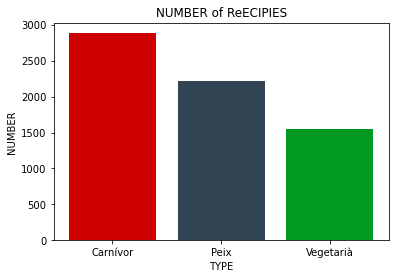

In [41]:
types = ['Carnívor','Peix','Vegetarià']
totals = [nodesertdf['Carnívor'].sum(),nodesertdf['Peix'].sum(),nodesertdf['Vegetarià'].sum()]
plt.bar(types,totals,color=['#cc0000', '#334455', '#009922'])

plt.title('NUMBER of ReECIPIES')
plt.xlabel('TYPE')
plt.ylabel('NUMBER')

plt.show()

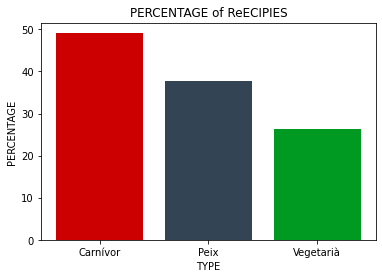

In [42]:
types = ['Carnívor','Peix','Vegetarià']
totals = [nodesertdf['Carnívor'].sum()/len(nodesertdf)*100,
          nodesertdf['Peix'].sum()/len(nodesertdf)*100,
          nodesertdf['Vegetarià'].sum()/len(nodesertdf)*100]
plt.bar(types,totals,color=['#cc0000', '#334455', '#009922'])

plt.title('PERCENTAGE of ReECIPIES')
plt.xlabel('TYPE')
plt.ylabel('PERCENTAGE')

plt.show()

<br><br><br><br>
##### Find the most common ingredients

In [199]:
recep_text=cuinesdf['Ingredients'].str.cat(sep=' ')

In [200]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [201]:
recep_text

'ingredients per a 4 persones:1 peça d\'escórpora de 2 kg, aprox.\nsal/pebre\noli d\'oliva\nper a la crema de carbassa\n800 g de carbassa\n1 poma granny smith\n250 g de patata monalisa\n100 g de ceba\n1 gra d\'all\n1 pols de curry\noli d\'oliva verge\nsal/pebreper a la sal de sèsam10 g de llavors de sèsam\n1 polsim de sal ingredients per a 4 persones:200 g de sonsos\n500 cl d\'oli d\'oliva per fregir\nsal\n8 ous\noli d\'oliva\n2 tomàquets madurs\n3 grans d\'all\n1 nyora\n3 ametlles\n3 avellanes\n20 ml de vinagre\n1 llesca de pa torrat\nsal ingredients per a 4 persones:per a la sípia\n160 g de sípia neta\n100 g de sal\n1 l d\'aigua mineral\n\xa0per al fumet blanc\n500 g de peix per fer sopa\n100 g de ceba de figueres\n60 g de porro\n30 g d\'api\n1,5 l d\'aigua mineral\n30 g oli d\'oliva\n\xa0per a la llet de tigre\n700 g de fumet blanc\n60 g de ceba de figueres\n60 g de pebrot groc\n60 g de pebrot vermell\n35 g de llima\n1 xili habanero\nun polsim de sal\xa0per a la ceba adobada\n100 g 

In [202]:
recep_text=recep_text.replace('\n', ' ').replace('d\'', '').replace('l\'', '').replace('\xa0', '')
#remove numbers
recep_text=re.sub(r'\d+', ' ' ,recep_text)
recep_text

'ingredients per a   persones:  peça escórpora de   kg, aprox. sal/pebre oli oliva per a la crema de carbassa   g de carbassa   poma granny smith   g de patata monalisa   g de ceba   gra all   pols de curry oli oliva verge sal/pebreper a la sal de sèsam  g de llavors de sèsam   polsim de sal ingredients per a   persones:  g de sonsos   cl oli oliva per fregir sal   ous oli oliva   tomàquets madurs   grans all   nyora   ametlles   avellanes   ml de vinagre   llesca de pa torrat sal ingredients per a   persones:per a la sípia   g de sípia neta   g de sal   l aigua mineral per al fumet blanc   g de peix per fer sopa   g de ceba de figueres   g de porro   g api  ,  l aigua mineral   g oli oliva per a la llet de tigre   g de fumet blanc   g de ceba de figueres   g de pebrot groc   g de pebrot vermell   g de llima   xili habanero un polsim de salper a la ceba adobada   g de ceba de figueres   g de vinagre de gerds ingredients per a   persones  escórpora   castanyola   tomàquets   pastanaga  

In [203]:
recep_word=word_tokenize(recep_text)
recep_word

['ingredients',
 'per',
 'a',
 'persones',
 ':',
 'peça',
 'escórpora',
 'de',
 'kg',
 ',',
 'aprox',
 '.',
 'sal/pebre',
 'oli',
 'oliva',
 'per',
 'a',
 'la',
 'crema',
 'de',
 'carbassa',
 'g',
 'de',
 'carbassa',
 'poma',
 'granny',
 'smith',
 'g',
 'de',
 'patata',
 'monalisa',
 'g',
 'de',
 'ceba',
 'gra',
 'all',
 'pols',
 'de',
 'curry',
 'oli',
 'oliva',
 'verge',
 'sal/pebreper',
 'a',
 'la',
 'sal',
 'de',
 'sèsam',
 'g',
 'de',
 'llavors',
 'de',
 'sèsam',
 'polsim',
 'de',
 'sal',
 'ingredients',
 'per',
 'a',
 'persones',
 ':',
 'g',
 'de',
 'sonsos',
 'cl',
 'oli',
 'oliva',
 'per',
 'fregir',
 'sal',
 'ous',
 'oli',
 'oliva',
 'tomàquets',
 'madurs',
 'grans',
 'all',
 'nyora',
 'ametlles',
 'avellanes',
 'ml',
 'de',
 'vinagre',
 'llesca',
 'de',
 'pa',
 'torrat',
 'sal',
 'ingredients',
 'per',
 'a',
 'persones',
 ':',
 'per',
 'a',
 'la',
 'sípia',
 'g',
 'de',
 'sípia',
 'neta',
 'g',
 'de',
 'sal',
 'l',
 'aigua',
 'mineral',
 'per',
 'al',
 'fumet',
 'blanc',
 'g'

In [204]:
recep_word.remove('pol')

ValueError: list.remove(x): x not in list

In [ ]:
#Stopwords
f, g = open("stpwrds.txt", "r"), open("ingredients.txt", "r")
stopwords_ca=f.read() + ', ' + g.read()
stopwords_ca=list(stopwords_ca.split(","))


In [ ]:
stopwords=[]
for wrd in stopwords_ca:
    word=wrd.replace(' ', '')
    stopwords.append(word)


In [ ]:
receptes_lst=[]
for w in recep_word:
    if w not in stopwords:
        receptes_lst.append(w)

In [205]:
from wordcloud import WordCloud

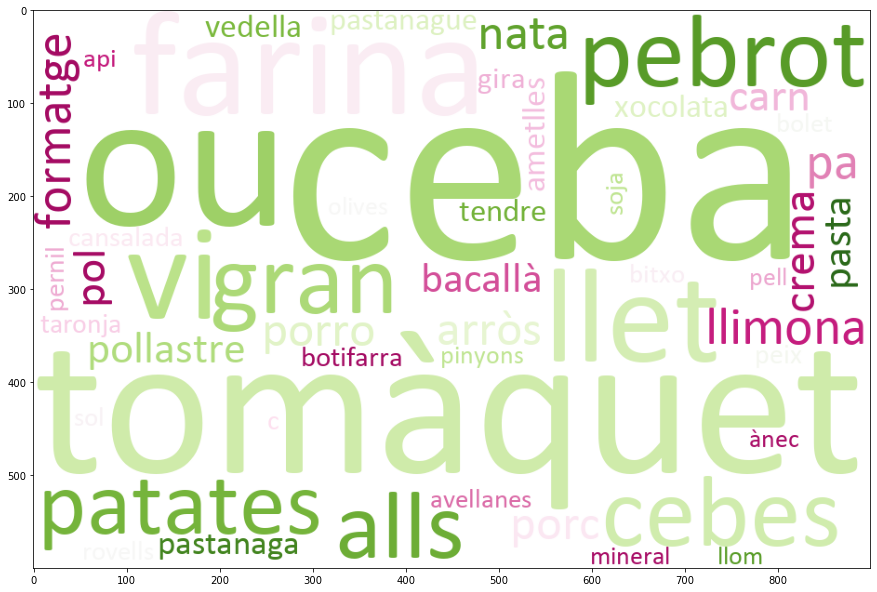

In [207]:
plt.figure(figsize=(15,11))

wordcloud = WordCloud(width =900, height = 600, max_words=50, relative_scaling=.5,
                      background_color='#ffffff', colormap='PiYG', font_path='/Calibri Regular.ttf',
                      collocations=False).generate(' '.join(map(str, receptes_lst)))
plt.imshow(wordcloud)